In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
!wget https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0

--2024-02-02 04:17:07--  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4jw31k5mlzcmgis/genres.tar.gz [following]
--2024-02-02 04:17:07--  https://www.dropbox.com/s/raw/4jw31k5mlzcmgis/genres.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc42f40909198d8fc075d6cec17d.dl.dropboxusercontent.com/cd/0/inline/CMfWdEDpDN_EhyR7Mfi2d0j25slqfiyeHmzRqXDe_ePdrXNR386Dd70HQrJUvtTRN5x6WAlOaiMOAfz25G7WCYkDB9VTlDFM-j8WMs6kZgEqfxUGNLrZ05hZioRFIhBwBOY/file# [following]
--2024-02-02 04:17:08--  https://uc42f40909198d8fc075d6cec17d.dl.dropboxusercontent.com/cd/0/inline/CMfWdEDpDN_EhyR7Mfi2d0j25slqfiyeHmzRqXDe_ePdrXNR386Dd70HQrJUvtTRN5x6WAlOaiMOAfz25G7WCYkDB9VTlDFM-j8WMs6kZgEqfxUGNLr

In [ ]:
!tar -xzvf "/content/genres_csv.tar.gz" -C "/content/genres/"

genres/
genres/blues/
genres/blues/blues.00000.au
genres/blues/blues.00001.au
genres/blues/blues.00002.au
genres/blues/blues.00003.au
genres/blues/blues.00004.au
genres/blues/blues.00005.au
genres/blues/blues.00006.au
genres/blues/blues.00007.au
genres/blues/blues.00008.au
genres/blues/blues.00009.au
genres/blues/blues.00010.au
genres/blues/blues.00011.au
genres/blues/blues.00012.au
genres/blues/blues.00013.au
genres/blues/blues.00014.au
genres/blues/blues.00015.au
genres/blues/blues.00016.au
genres/blues/blues.00017.au
genres/blues/blues.00018.au
genres/blues/blues.00019.au
genres/blues/blues.00020.au
genres/blues/blues.00021.au
genres/blues/blues.00022.au
genres/blues/blues.00023.au
genres/blues/blues.00024.au
genres/blues/blues.00025.au
genres/blues/blues.00026.au
genres/blues/blues.00027.au
genres/blues/blues.00028.au
genres/blues/blues.00029.au
genres/blues/blues.00030.au
genres/blues/blues.00031.au
genres/blues/blues.00032.au
genres/blues/blues.00033.au
genres/blues/blues.00034.a

In [ ]:
##!tar -xzvf "/content/genres_csv.tar.gz" -C "/content/genres/"

In [ ]:
import librosa
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import categorical_crossentropy
##keras.utils.register_keras_serializable(categorical_crossentropy)


In [ ]:
def extract(x):
  import re
  return re.findall('^\w+', x)[0]

In [ ]:
extract('metal.00071.au')

'metal'

In [ ]:
def extract_features(file_path):
    all_files = os.walk(file_path)
    sound_files = []
    genres =[]
    for sound_file in all_files:
      all_sound_files = sound_file[2]
      for sfile in all_sound_files:
        try:
          audio, sample_rate = librosa.load(file_path+ '/' + sfile, res_type='kaiser_fast')
          mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
          mfccs_processed = np.mean(mfccs.T,axis=0)
          sound_files.append(mfccs_processed)
          genres.append(extract(sfile))
        except Exception as e:
          print("Error encountered while parsing file: ", file_path)
          print(e)
          return None
    return sound_files, genres


In [ ]:
## path dataset
dataset_path = '/content/genres/'
all_genres = os.listdir(dataset_path)

In [ ]:
all_genres

['genres']

In [ ]:
## processing each file
features = []
labels = []

for genre in all_genres:
  genre_folder =  os.path.join(dataset_path, genre)
  for file in os.listdir(genre_folder):
      print(f'For file path {genre_folder} and sub type of music genre {file}')
      file_path = os.path.join(genre_folder, file)
      data, genre_value = extract_features(file_path)
      if data is not None:
            features.append(data)
            labels.append(genre_value)

For file path /content/genres/genres and sub type of music genre country
For file path /content/genres/genres and sub type of music genre rock
For file path /content/genres/genres and sub type of music genre jazz
For file path /content/genres/genres and sub type of music genre hiphop
For file path /content/genres/genres and sub type of music genre blues
For file path /content/genres/genres and sub type of music genre metal
For file path /content/genres/genres and sub type of music genre pop
For file path /content/genres/genres and sub type of music genre classical
For file path /content/genres/genres and sub type of music genre reggae
For file path /content/genres/genres and sub type of music genre disco


In [ ]:
np.array(features).shape


(10, 100, 40)

In [ ]:
labels = np.array(labels)

In [ ]:
labels.shape

(10, 100)

In [ ]:
## reshaping creating and one hot encoding of labels
num_genres = 10
num_records = 100
num_features = 40

features = features.reshape(num_genres * num_records, num_features)
labels = np.array([[i]*num_records for i in range(num_genres)]).flatten()
labels = tf.keras.utils.to_categorical(labels, num_classes=num_genres)

In [ ]:
## reshaping creating and one hot encoding of labels
num_genres = 10
num_records = 100
num_features = 40

features = np.array(features)
features = features.reshape(num_genres * num_records, num_features)
labels = np.array([[i]*num_records for i in range(num_genres)]).flatten()
labels = tf.keras.utils.to_categorical(labels, num_classes=num_genres)

In [ ]:
features.shape, labels.shape

((1000, 40), (1000, 10))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

## Sequential API
##model = models.Sequential([
  ##  layers.Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
    ##layers.Dense(128, activation='relu'),
    ##layers.Dense(10, activation='softmax')  # 10 output nodes for 10 genres
##)



model = Sequential(
    [
        Dense(256, activation='relu', input_shape=(num_features,)),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_genres, activation='softmax')
    ]
)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=16, epochs=100,
                    validation_data=(X_test, y_test))

Epoch 1/100
50/50 [==============================] - 1s 10ms/step - loss: 19.3078 - accuracy: 0.1325 - val_loss: 2.8736 - val_accuracy: 0.3300
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 7.3643 - accuracy: 0.1875 - val_loss: 1.9535 - val_accuracy: 0.2700
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 3.8297 - accuracy: 0.2138 - val_loss: 1.9888 - val_accuracy: 0.3150
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 2.9212 - accuracy: 0.2037 - val_loss: 2.0955 - val_accuracy: 0.2450
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 2.6847 - accuracy: 0.1700 - val_loss: 2.1119 - val_accuracy: 0.2250
Epoch 6/100
50/50 [==============================] - 0s 6ms/step - loss: 2.3887 - accuracy: 0.2113 - val_loss: 2.0800 - val_accuracy: 0.2150
Epoch 7/100
50/50 [==============================] - 0s 6ms/step - loss: 2.2211 - accuracy: 0.2275 - val_loss: 2.0243 - val_accuracy: 0.2450
Epoch 8/100

In [ ]:
##model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], custom_objects={'categorical_crossentropy': tf.keras.losses.CategoricalCrossentropy()})
##history = model.fit(X_train, y_train, batch_size=16, epochs=100,
                   ## validation_data=(X_test, y_test))

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

7/7 [==============================] - 0s 12ms/step - loss: 1.1973 - accuracy: 0.6700
Test Accuracy: 0.6700000166893005


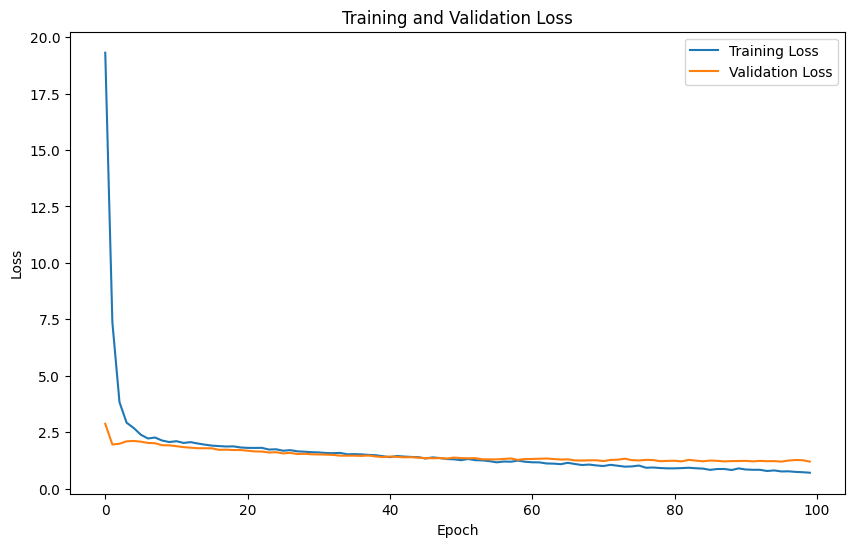

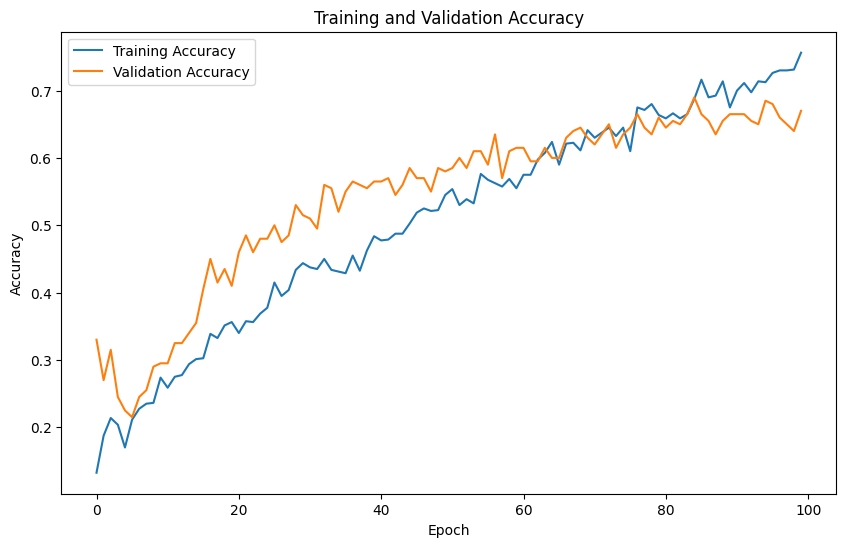

In [ ]:
  import matplotlib.pyplot as plt

# Assuming you already have the 'history' object

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Assuming you already have the 'history' object and 'test_loss', 'test_accuracy' variables

# Extract information from the training history
training_metrics = pd.DataFrame(history.history)

# Add test metrics to the DataFrame
test_metrics = {'Test Loss': test_loss, 'Test Accuracy': test_accuracy}
training_metrics = training_metrics.append(test_metrics, ignore_index=True)

# Display the DataFrame
print(training_metrics)

# Save the DataFrame to a CSV file if needed
training_metrics.to_csv('training_metrics.csv', index=False)


          loss  accuracy  val_loss  val_accuracy  Test Loss  Test Accuracy
0    19.307806   0.13250  2.873603         0.330        NaN            NaN
1     7.364294   0.18750  1.953546         0.270        NaN            NaN
2     3.829652   0.21375  1.988790         0.315        NaN            NaN
3     2.921171   0.20375  2.095500         0.245        NaN            NaN
4     2.684689   0.17000  2.111933         0.225        NaN            NaN
..         ...       ...       ...           ...        ...            ...
96    0.767148   0.73000  1.244437         0.660        NaN            NaN
97    0.741572   0.73000  1.267869         0.650        NaN            NaN
98    0.727147   0.73125  1.258871         0.640        NaN            NaN
99    0.704743   0.75625  1.197307         0.670        NaN            NaN
100        NaN       NaN       NaN           NaN   1.197307           0.67

[101 rows x 6 columns]


<ipython-input-54-1a011f6cd8c4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_metrics = training_metrics.append(test_metrics, ignore_index=True)
